# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 марта, -4 балла после 06:00 25 марта, -6 баллов после 06:00 2 апреля

Отправлять дз не нужно, нужно закоммитить в github. Сдается дз лично преподавателю на рубежном контроле (13 марта)

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Cчитываем данные, полученные в результате выполнения домашнего задания из курса введения, в `data frame` библиотеки `pandas`. Достаем координаты и конвертируем в массив `numpy`. Возможно, в собранном вами файле кодировка будет иной.

In [2]:
data_df = pd.read_csv("vk_places_first_5000.csv", sep=",", header=0, encoding='utf-8')
data_df.head()

,Unnamed: 0,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,0,Мячковский б-р 3а,435,1,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
1,1,Дачная 2а,14,123,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
2,2,Лени Голикова 29,8,2,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,3,Героев Танкограда 63,8,158,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,4,Мусы Джалиля 14К1,38,99,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.488720e+09


In [3]:
X = data_df[['latitude', 'longitude']].values
print X

[[ 55.657941  37.751574]
 [ 53.202017  50.141377]
 [ 59.843376  30.23148 ]
 ..., 
 [ 55.76363   37.597046]
 [ 56.002732  37.209755]
 [ 47.225695  39.72997 ]]


Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1 Баранчиков Максим	
2 Бекбулатов Рамзан	
3 Белозёров Михаил	
4 Бобылев Владислав	
5 Брызгалов Антон	
6 Будюк Алексей	
7 Валиуллин Альберт	
8 Валиуллин Артур	
9 Васильев Евгений	
10 Галицкий Игорь	
11 Горшков Сергей	
12 Гусев Вячеслав	
13 Дегтярев Роман	
14 Дементьев Максим	
15 Елохов Артур	
16 Ефимов Владислав	
17 Зайцев Александр	
18 Ильин Иван	
19 Имеев Мерген	
20 Камалбеков Тимур	
21 Капитонов Александр	
22 Каспарьянц Георгий	
23 Кафанов Олег	
24 Клейменов Андрей	
25 Козлов Иван	
26 Колмакова Татьяна	
27 Комов Евгений	
28 Крылов Иван	
29 Кузьмина Ирина	
30 Куклева Анна	
31 Курьянов Илья	
32 Лобанов Алексей	
33 Лозинский Иван	
34 Лузин Игорь	
35 Лукьянчиков Иван	
36 Неред Максим	
37 Новикова Анастасия	
38 Новичков Сергей	
39 Омаров Темирхан	
40 Павлова Анастасия	
41 Петренко Иван	
42 Пилюгин Вадим	
43 Плошкин Александр	
44 Полякова Вера	
45 Попкова Екатерина	
46 Преображенский Анатолий	
47 Пронин Сергей	
48 Пучкин Данила	
49 Рогачев Александр	
50 Руденко Дмитрий	
51 Рыбаков Владислав	
52 Санников Артём	
53 Скиба Глеб	
54 Страдомский Сергей	
55 Тескер Константин	
56 Трифанов Петр	
57 Хапкин Артем	
58 Хорошенький Илья	
59 Чокля Дмитрий	
60 Шмурак Денис	
61 Щербакова Елена	

In [4]:
N = 47 # put your index here

In [5]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'OPTICS. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [278]:
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics.pairwise import distance_metrics
import numpy as np
import pandas as pd

class OPTICS(BaseEstimator, ClusterMixin):
    """
    Implementation of OPTICS algorithm  
    """
    
    def __init__(self, eps, min_pts, **kwargs):
        # set main parameters
        self._min_pts = min_pts
        self._eps = eps
        
        # set metric
        if 'metric' in kwargs:
            self._metric = kwargs['metric']
        else:
            self._metric = 'euclidean'
            
        # check params after initialization
        self._check_params()
        
        # is used to check if fitted
        self._is_fitted = False
        
        # UNDEFINED constant
        self._undefined = np.inf
    
    def _check_params(self):
        if self._min_pts < 0:
            raise ValueError("min_pts parameter (set %d) must be non-negative" % (self._min_pts))
        
        if self._eps < 0:
            raise ValueError("eps parameter (set %d) must be non-negative" % (self._eps))
        
        if self._metric not in distance_metrics().keys():
            raise ValueError("specified metric (%s) is not supported. List of supported metrics:\n%s" % 
                             (self._metric, ', '.join(distance_metrics().keys())))
        
    def _check_and_prepare_X(self, X):
        # check X type
        if not isinstance(X, np.ndarray) and not isinstance(X, pd.DataFrame):
            raise ValueError("X must have numpy.ndarray or pandas.DataFrame type, but given X has type " +  str(type(X)))
        
        # convert X to a numpy matrix format
        if isinstance(X, pd.DataFrame):
            self._X = X.as_matrix()
        else:
            self._X = X
        
        # check other params according to X
        if self._min_pts > self._X.shape[0]:
            raise ValueError("min_pts parameter (set %d) must not be greater than X size (%d)" % 
                             (self._min_pts, self._X.shape[0]))
        
    
    def _neighbours_idxs(self, idx):
        neighbours_mask = (distance_metrics()[self._metric](self._X[idx].reshape(1, -1), self._X) < self._eps).ravel()
        neighbours_mask[idx] = False
        return np.arange(self._X.shape[0])[neighbours_mask]
    
    def _neighbours(self, idx):
        return self._X[self._neighbours_idxs(idx)]
    
    def _core_dist(self, idx, neighbours = None):
        N = neighbours if neighbours is not None else self._neighbours(idx)
        if N.shape[0] < self._min_pts:
            return self._undefined
        return sorted(distance_metrics()[self._metric](self._X[idx].reshape(1, -1), N).ravel())[self._min_pts - 1]
    
    def _reachability_dist(self, idx_1, idx_2, core_dist = None, neighbours = None):
        if core_dist is not None:
            coredist = core_dist
        else:
            N = neighbours if neighbours is not None else self._neighbours(idx_1)
            coredist = self._core_dist(self._X[idx_1], N)
        if coredist == self._undefined:
            return self._undefined
        return max(coredist, 
                   distance_metrics()[self._metric](self._X[idx_1].reshape(1, -1), self._X[idx_2].reshape(1, -1)).ravel()[0])
    
    def _mark_processed(self, idx):
        self._unprocessed[idx] = False
        self._ordered_list.append(idx)
           
    def _update(self, neighbours_idxs, idx, seeds):
        # precompute core_distance for X[idx]
        coredist = self._core_dist(idx, self._X[neighbours_idxs])
        
        # for each unprocessed neighbour of X[idx]
        unprocessed_neighbours_mask = (self._unprocessed[neighbours_idxs] == True).ravel()
        for un_idx in neighbours_idxs[unprocessed_neighbours_mask]:
            new_reachability_distance = self._reachability_dist(idx, un_idx, coredist)
            if new_reachability_distance < self._reachability_distances[un_idx]:
                self._reachability_distances[un_idx] = new_reachability_distance
                seeds[un_idx] = new_reachability_distance

        return seeds
    
    def fit(self, X, y=None):
        """
        Uses data matrix X to compute model parameters
        """
        # check and prepare X
        self._check_and_prepare_X(X)
        
        # prepare data structures
        self._ordered_list = []
        self._unprocessed = np.ones(self._X.shape[0], dtype=bool)
        self._core_distances = np.ones(self._X.shape[0]) * self._undefined
        self._reachability_distances = np.ones(self._X.shape[0]) * self._undefined            
        while np.any(self._unprocessed):
            # get index idx of first unprocessed point
            idx = np.nonzero(self._unprocessed)[0][0]
            # mark point X[idx] as processed and find indexes of its neighbours
            self._mark_processed(idx)
            x_neighbours_idxs = self._neighbours_idxs(idx)
            
            # store core distance for current point
            self._core_distances[idx] = self._core_dist(idx, self._X[x_neighbours_idxs])
            
            # if point X[idx] has core distance
            if self._core_distances[idx] != self._undefined:
                # update reachability distance for each unprocessed neighbor of point X[idx]
                # seeds contains indexes of neighbors and their reachability_distance as priority: (reachability_distance, idx)
                seeds = {}
                seeds = self._update(x_neighbours_idxs, idx, seeds)
                
                # while there are unprocessed neighbours
                while seeds:
                    # pop index z_idx of point with smallest reachability_distance
                    z_idx = min(seeds, key=seeds.get)
                    seeds.pop(z_idx)
                    
                    # mark point X[z_idx] as processed and find indexes of its neighbours
                    self._mark_processed(z_idx)
                    z_neighbours_idxs = self._neighbours_idxs(z_idx)
                    
                    # store core distance for current point
                    self._core_distances[z_idx] = self._core_dist(z_idx, self._X[z_neighbours_idxs])
                    
                    # if point X[z_idx] has core distance
                    if self._core_distances[z_idx] != self._undefined:
                        # update reachability distance for each unprocessed neighbor of point X[z_idx]
                        seeds = self._update(z_neighbours_idxs, z_idx, seeds)
             
        self._is_fitted = True
        return self
    
    def extractDBSCAN(self, eps_1):
        if not self._is_fitted:
            return None
        
        # use label -1 for noise points
        self._labels = -np.ones(self._X.shape[0])
        cur_label = -1
        
        for i in xrange(len(self._ordered_list)):
            idx = self._ordered_list[i]
            if self._reachability_distances[idx] > eps_1:
                if self._core_distances[idx] <= eps_1:
                    cur_label += 1
                    self._labels[idx] = cur_label
                else:
                    self._labels[idx] = -1
            else:
                self._labels[idx] = cur_label  
        return self._labels

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

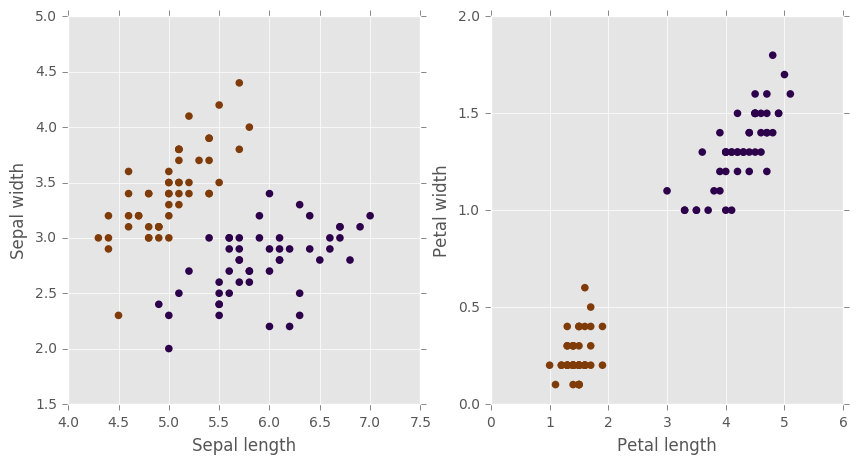

In [336]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [337]:
clr = OPTICS(10, 3)
clr.fit(x_iris)
clr.extractDBSCAN(0.8)
pred_iris = clr._labels
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


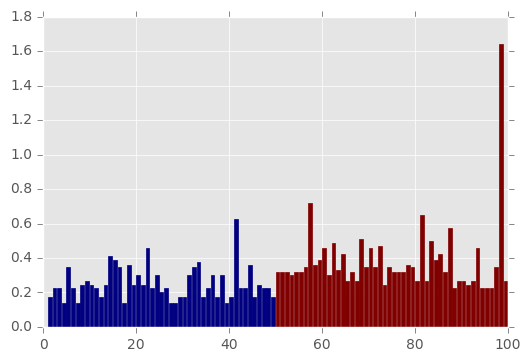

In [338]:
import matplotlib.cm as cm

barlist = []
norm = matplotlib.colors.Normalize(vmin=min(pred_iris), vmax=max(pred_iris), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.jet)

for idx in xrange(len(clr._ordered_list)):
    barlist += plt.bar(idx, clr._reachability_distances[idx], 
                       color=mapper.to_rgba(pred_iris[idx]), edgecolor=mapper.to_rgba(pred_iris[idx]))
plt.show()

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [340]:
from collections import Counter
from sklearn.metrics.pairwise import pairwise_distances
def sil_score(X, y, metric='euclidean'):
    """
    Implement quality criterion of your choice
    """
    distances = pairwise_distances(X, metric=metric)

    in_cluster_dists = np.zeros(distances.shape[0], dtype=distances.dtype)
    inter_cluster_dists = np.ones(distances.shape[0], dtype=distances.dtype) * np.inf
    unique_labels = np.unique(y)
    samples_per_label = Counter()
    for label in y:
        samples_per_label[label] += 1
    
    for cur_label in unique_labels:
        
        mask = (y == cur_label)
        cur_distances = distances[mask]

        samples_per_cur_label = samples_per_label[cur_label]
        if samples_per_cur_label:
            in_cluster_dists[mask] = np.mean(cur_distances[:,mask], axis=1)

        for label in unique_labels:
            if label != cur_label:
                other_mask = (y == label)
                other_distances = np.mean(cur_distances[:, other_mask], axis=1)
                inter_cluster_dists[mask] = np.minimum(inter_cluster_dists[mask], other_distances)
    silhouette_samples = (inter_cluster_dists - in_cluster_dists) / np.maximum(in_cluster_dists, inter_cluster_dists)

    for label in unique_labels:
        if samples_per_label[label] == 1:
            silhouette_samples[label] = 0
    return np.mean(silhouette_samples)


Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

In [291]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [342]:
X = data_df[['latitude', 'longitude']].values
print type(X)

<type 'numpy.ndarray'>


In [344]:
clr = OPTICS(0.5, 3)
clr.fit(X)

OPTICS(eps=None, min_pts=None)

In [359]:
X_labels = clr.extractDBSCAN(0.3)
print "number of clusters: ", np.unique(X_labels).shape[0] - 1

number of clusters:  27


In [360]:
print sil_score(X, X_labels)
print silhouette_score(X, X_labels)

0.945597464248
0.945462069113


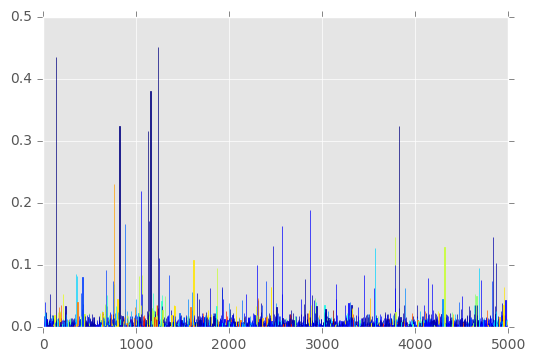

In [354]:
import matplotlib.cm as cm

barlist = []
norm = matplotlib.colors.Normalize(vmin=min(X_labels), vmax=max(X_labels), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.jet)

for idx in xrange(len(clr._ordered_list)):
    barlist += plt.bar(idx, clr._reachability_distances[idx], 
                       color=mapper.to_rgba(X_labels[idx]), edgecolor=mapper.to_rgba(X_labels[idx]))
plt.show()

best number of clusters for AgglomerativeClustering:  25


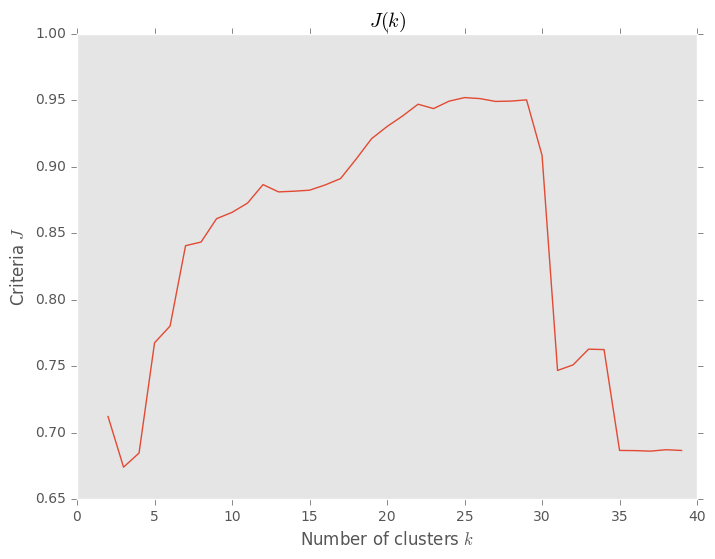

In [357]:
ks = range(2, 40)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    cls = AgglomerativeClustering(n_clusters=k)
    y = cls.fit_predict(X)
    criteria[i] = silhouette_score(X, y)
    
print "best number of clusters for AgglomerativeClustering: ", np.argmax(np.array(criteria)) + 2
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

In [358]:
%timeit -n 1 cls = AgglomerativeClustering()

The slowest run took 4.25 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 2.28 µs per loop


Визуализируем кластеризацию на карте

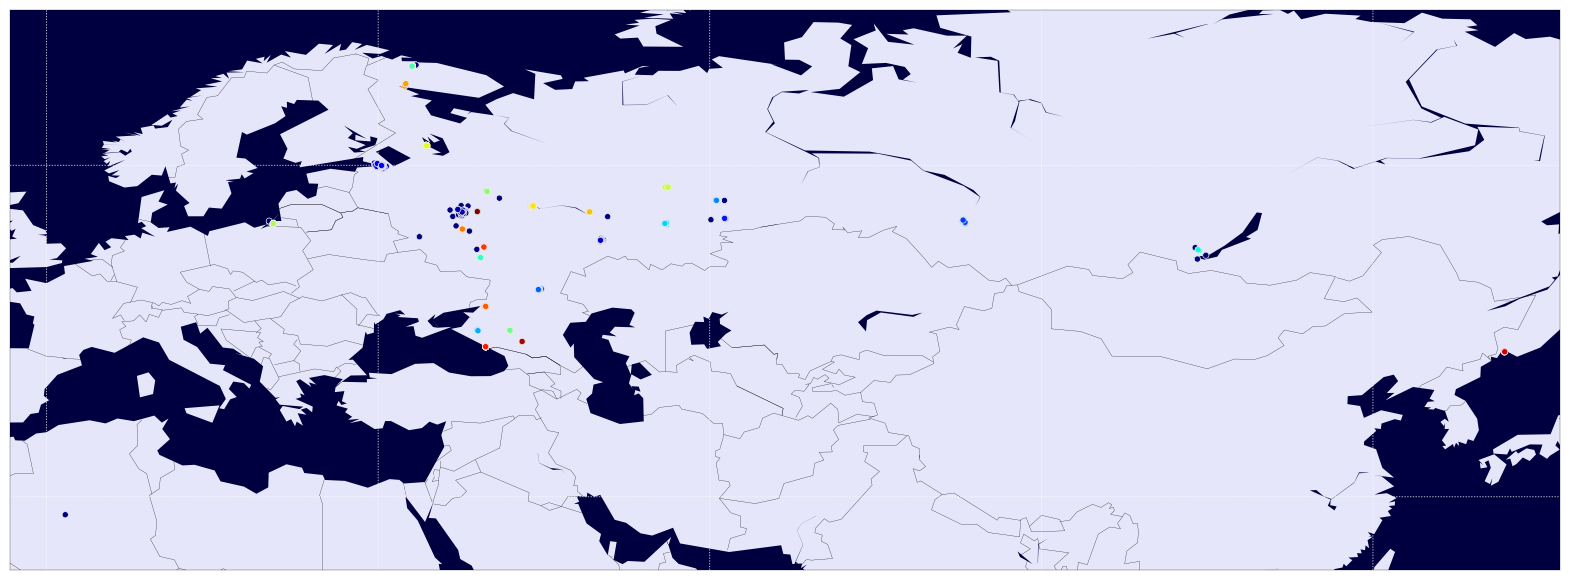

In [361]:
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=min(X[:, 0]) - 5, urcrnrlat=max(X[:, 0]) + 5, llcrnrlon=min(X[:, 1]) - 5, urcrnrlon=max(X[:, 1]) + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(X[:,1], X[:,0], c=X_labels, zorder=10)
    
pl.show()

Визуализируйте интересные участки (может быть это Москва) в приближенном виде. Постройте 3 (или более, в зависимости от данных, что вам самим бы хотелось увидеть ближе) увеличенных изображений карты с кластеризацией.

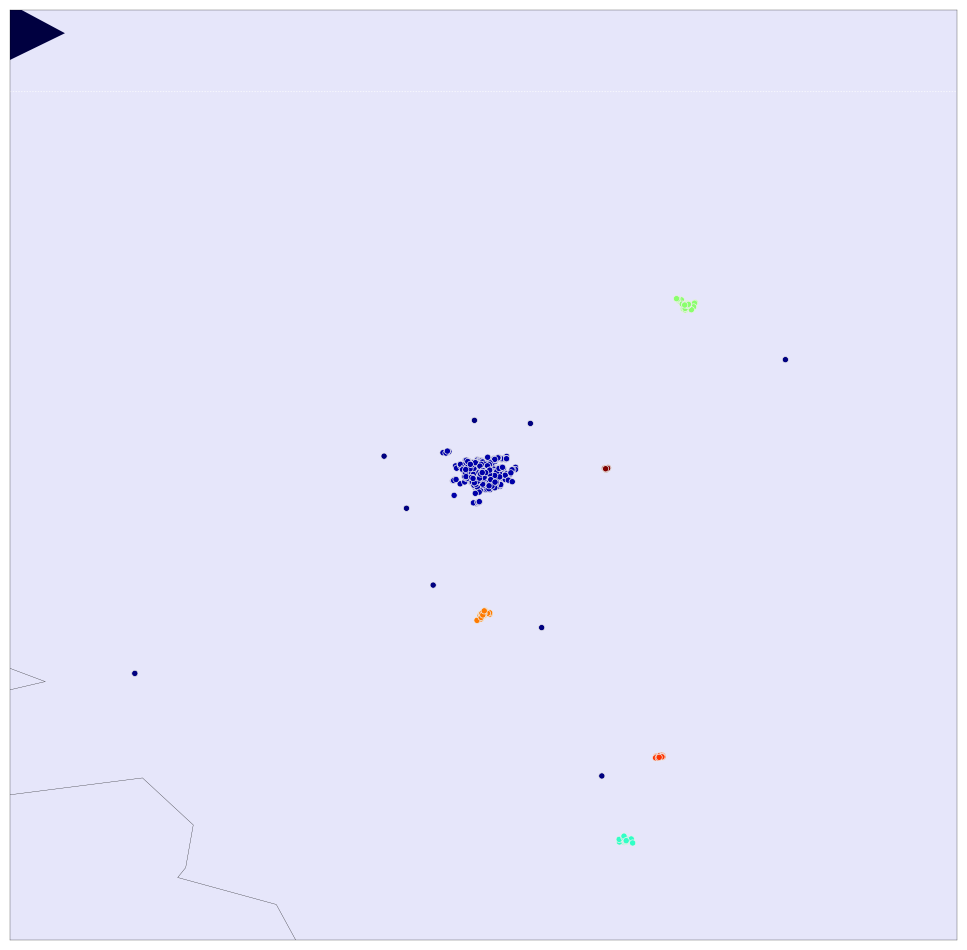

In [363]:
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=mos_min_lat-5, urcrnrlat=mos_max_lat+5, 
               llcrnrlon=mos_min_lon - 5, urcrnrlon=mos_max_lon + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(X[:, 1], X[:,0], c=X_labels, zorder=10)
    
pl.show()

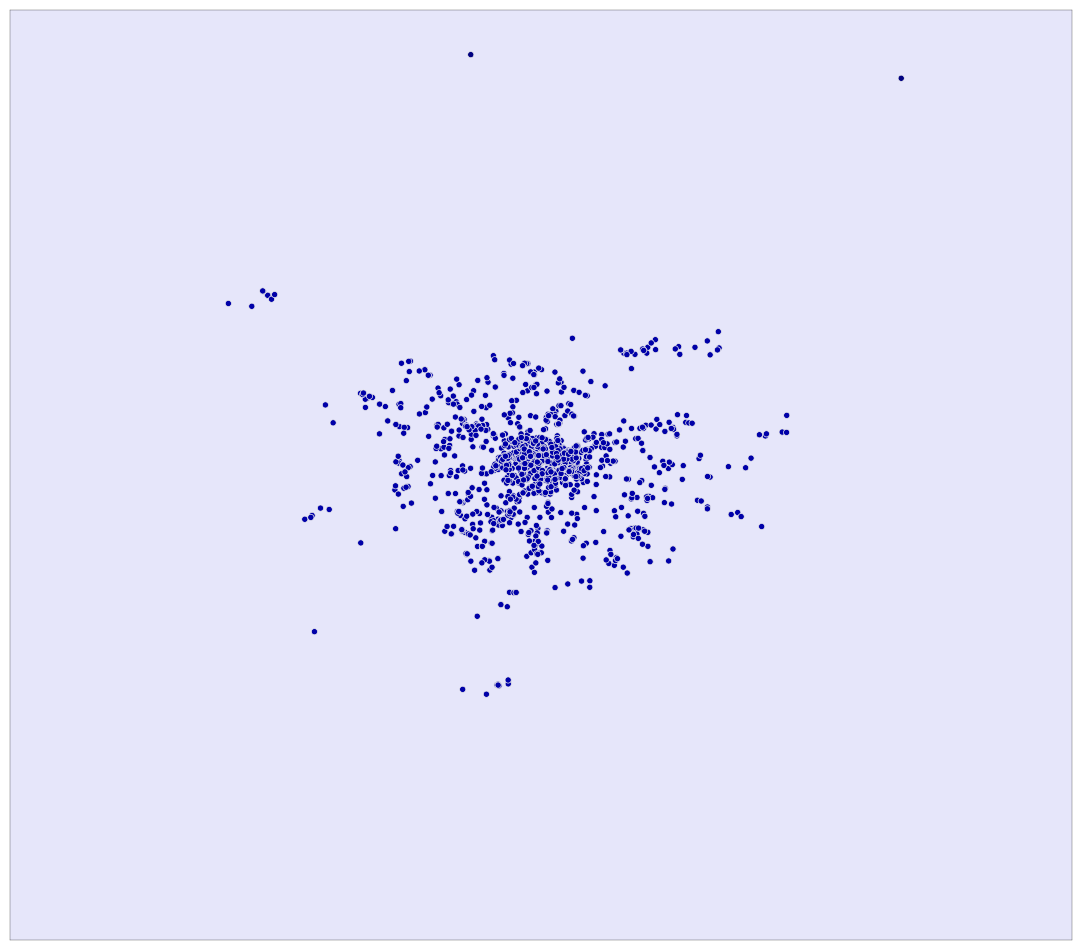

In [364]:
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=mos_min_lat-0.5, urcrnrlat=mos_max_lat+0.5, 
               llcrnrlon=mos_min_lon - 0.5, urcrnrlon=mos_max_lon + 0.5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(X[:, 1], X[:,0], c=X_labels, zorder=10)
    
pl.show()

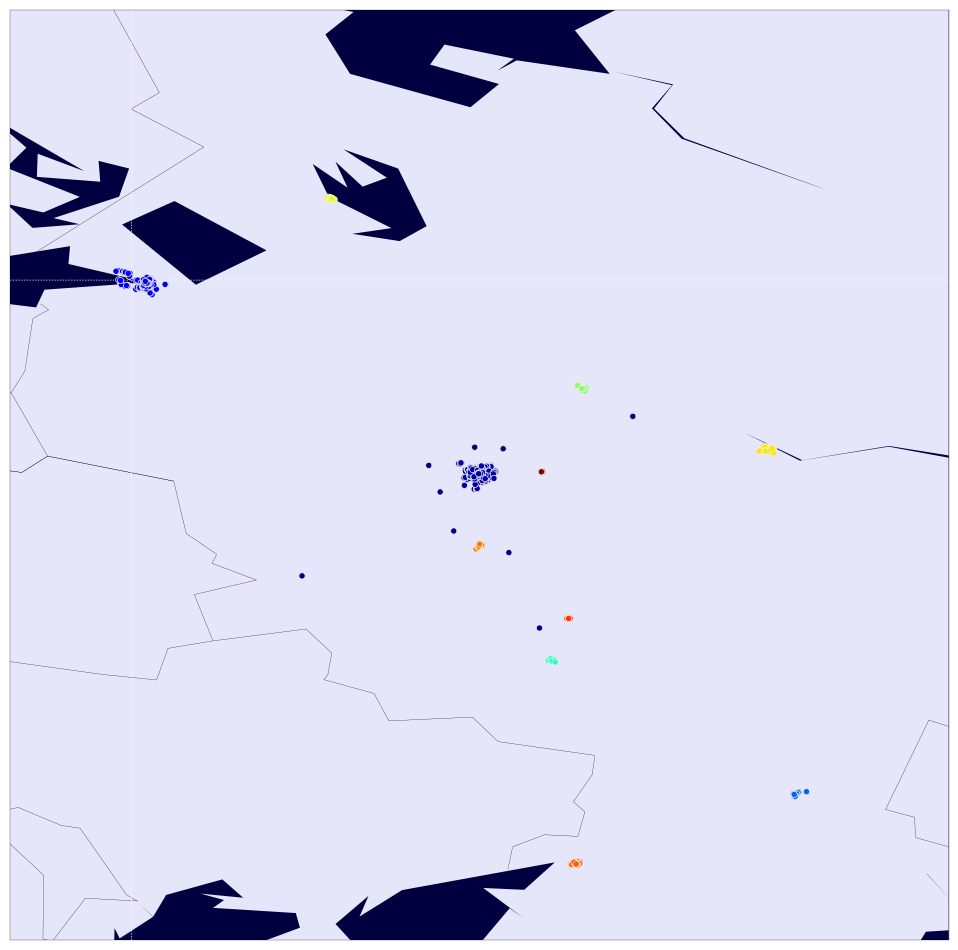

In [365]:
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=mos_min_lat-10, urcrnrlat=mos_max_lat+10, 
               llcrnrlon=mos_min_lon - 10, urcrnrlon=mos_max_lon + 10, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(X[:, 1], X[:,0], c=X_labels, zorder=10)
    
pl.show()

Какой вывод можно сделать о качестве кластеризации?

Покоординатная кластеризация алгоритмом OPTICS выполнена хорошо при подборе параметров модели, опираясь на данные silhouette_score (значение равно 0.945597464248, что почти идеально по данной метрике, что обусловлено тем, что города расположены далеко друг от друга, но места с чекинами внутри одного города близки друг к другу).
На карте также видно чёткое разбиение координат чекинов по городам.

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.